## Task 3 : Feature Selection
**Import required libraries**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/home/saif/Desktop/Customer Churn Analysis and Prediction/encoded_df.csv")

In [4]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6084,1,0,0,0,1,1,0,0,-1,-1,-1,-1,-1,-1,1,0,2,19.95,19.95,0
4564,0,0,1,0,71,1,1,1,1,1,1,1,1,1,24,0,1,90.10,6310.90,0
1556,1,1,0,0,10,1,1,2,0,0,0,0,1,1,1,1,1,95.35,898.35,1
5058,0,0,1,1,7,1,0,0,-1,-1,-1,-1,-1,-1,24,0,2,19.85,144.15,0
5392,1,1,1,0,61,1,1,2,0,1,0,1,0,0,12,1,3,85.55,5251.75,0


### Plotting heatmap to check correlation of the features with the Churn

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


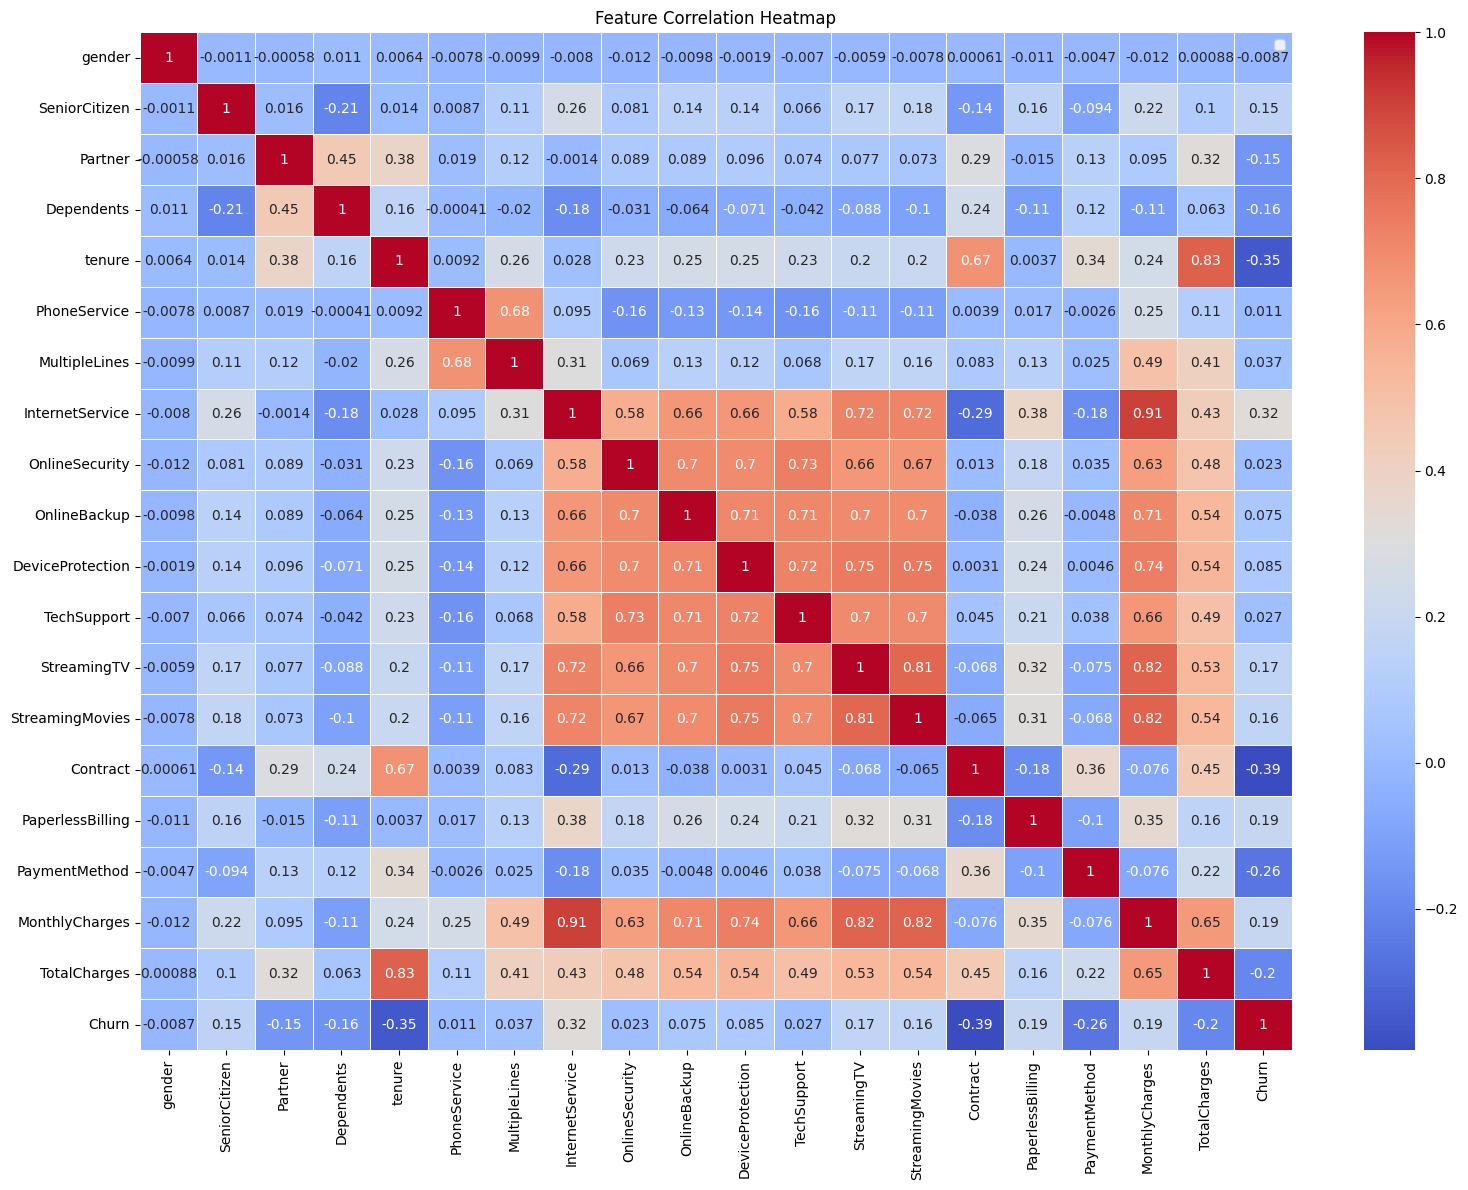

In [8]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.legend()
plt.show()

In the correlation heatmap, we focus on the "Churn" column to analyze how strongly each feature is related to customer churn.

1. Top Features Positively Correlated with Churn (Customers More Likely to Churn)
- MonthlyCharges (0.19) → Higher monthly charges are associated with a higher likelihood of churn.
- PaperlessBilling (0.19) → Customers using paperless billing tend to churn more.
- InternetService (0.32) → The type of internet service affects churn, with fiber-optic users likely churning more.

2. Top Features Negatively Correlated with Churn (Customers Less Likely to Churn)
- Tenure (-0.35) → Customers with a longer tenure are less likely to churn. This makes sense, as loyal customers tend to stay.
- Contract (-0.39) → Customers with longer contracts (e.g., yearly) are much less likely to churn than those with month-to-month contracts.
- TotalCharges (-0.20) → Higher total charges mean the customer has been with the company longer, reducing churn probability.

3. Other Observations
- TechSupport (-0.27) and OnlineSecurity (-0.29) → Customers who have technical support and security services tend to stay.
- PaymentMethod (-0.26) → Certain payment methods (likely credit cards/autopay) reduce churn compared to manual payments.

4. Key Takeaways for Feature Selection
- Keep important features like MonthlyCharges, Tenure, Contract, PaperlessBilling, TechSupport, and InternetService.
- Drop weakly correlated features like gender, PhoneService, and Dependents, as they have near-zero correlation with churn.

## Training Random forest regressor to get the important features

In [10]:
X = df.drop(columns=["Churn"]) 
y = df["Churn"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

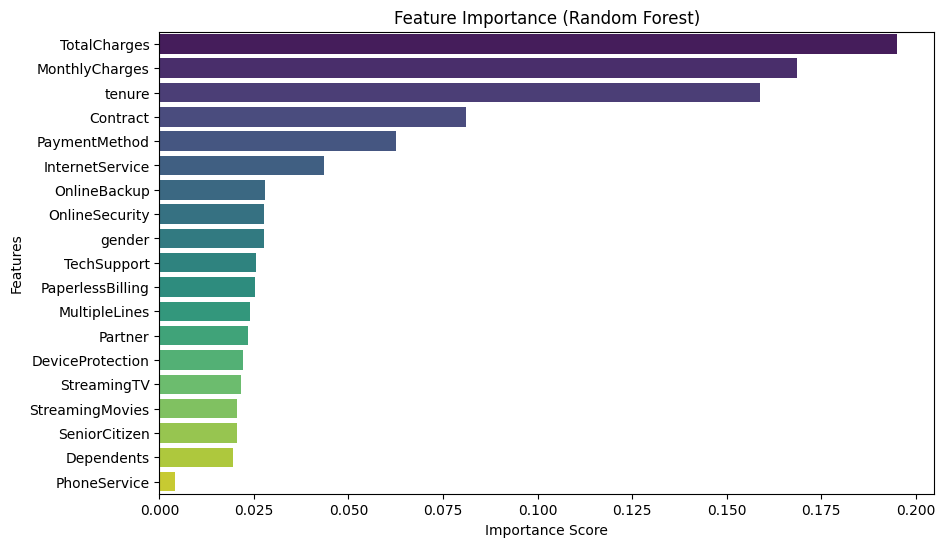

TotalCharges        0.195196
MonthlyCharges      0.168711
tenure              0.158924
Contract            0.081186
PaymentMethod       0.062632
InternetService     0.043437
OnlineBackup        0.027920
OnlineSecurity      0.027755
gender              0.027751
TechSupport         0.025645
PaperlessBilling    0.025381
MultipleLines       0.023977
Partner             0.023461
DeviceProtection    0.022131
StreamingTV         0.021464
StreamingMovies     0.020497
SeniorCitizen       0.020394
Dependents          0.019433
PhoneService        0.004105
dtype: float64


In [11]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Print top important features
print(feature_importances)

**🔥 Top Features influencing customer churn:**

- TotalCharges (18.9%)
- MonthlyCharges (16.7%)
- Tenure (16.2%)
- Contract Type (7.8%)
- Payment Method (6.1%)

**📌 Insights:**

- Billing-related features (TotalCharges, MonthlyCharges, Contract) are the most significant.
- Service-related features like InternetService, OnlineSecurity, and TechSupport also impact churn.
- Demographics (gender, SeniorCitizen, Partner, Dependents) have less importance.

### Heatmap vs. Random Forest Regressor?

- ✅ Random Forest captures non-linear relationships, while correlation (heatmap) only detects linear relationships.
- ✅ Random Forest directly measures predictive power, while correlation only shows associations, not cause-and-effect.
- ✅ Random Forest accounts for interactions between variables, while correlation treats each variable independently.

* I will keep top 12 feautres as per random forest regressor and drop others

In [12]:
# Select top 12 features and drop others
top_features = feature_importances.head(12).index.tolist()

In [13]:
top_features

['TotalCharges',
 'MonthlyCharges',
 'tenure',
 'Contract',
 'PaymentMethod',
 'InternetService',
 'OnlineBackup',
 'OnlineSecurity',
 'gender',
 'TechSupport',
 'PaperlessBilling',
 'MultipleLines']

In [15]:
# Save top features and Churn column from the df
selected_features = df[top_features + ["Churn"]]
selected_features.head()


,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,InternetService,OnlineBackup,OnlineSecurity,gender,TechSupport,PaperlessBilling,MultipleLines,Churn
0,29.85,29.85,1,1,1,1,1,0,0,0,1,-1,0
1,1889.50,56.95,34,12,2,1,0,1,1,0,0,0,0
2,108.15,53.85,2,1,2,1,1,1,1,0,1,0,1
3,1840.75,42.30,45,12,3,1,0,1,1,1,0,-1,0
4,151.65,70.70,2,1,1,2,0,0,0,0,1,0,1


In [ ]:
# Save it as csv
selected_features.to_csv("top_features.csv", index=False)